In [1]:
import torch
from torch import nn
import matplotlib
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

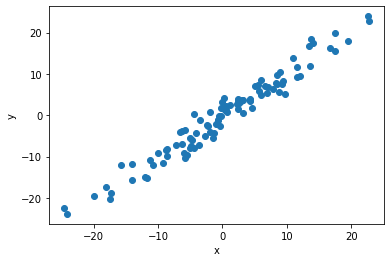

In [2]:
X = torch.randn(100, 1) * 10
y = X + 2 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
class Foo(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1,)
    def forward(self, x):
        return self.linear(x)

class Bar(nn.Module):
    def __init__(self):
        super().__init__()
        self.submodules = []
        self.submodules.append(Foo())
        self.submodules.append(Foo())
    def forward(self, x):
        a = x
        for m in self.submodules:
            a = m.forward(a)
        return a

class Baz(nn.Module):
    def __init__(self):
        super().__init__()
        self.foo_1 = Foo()
        self.foo_2 = Foo()
    def forward(self, x):
        a = x
        a = self.foo_1(a)
        a = self.foo_2(a)
        return a
    

In [4]:
torch.manual_seed(1)
model = Baz()
print(model)

Baz(
  (foo_1): Foo(
    (linear): Linear(in_features=1, out_features=1, bias=True)
  )
  (foo_2): Foo(
    (linear): Linear(in_features=1, out_features=1, bias=True)
  )
)


In [5]:
x = torch.tensor([[1.0], [2.0]])

def get_params():
    return list(model.parameters())

print(get_params())


[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True), Parameter containing:
tensor([[-0.1939]], requires_grad=True), Parameter containing:
tensor([0.4694], requires_grad=True)]


In [21]:
def plot_fit(title):
    plt.title = title
    x1 = np.array([-30, 30])
    y1 = model.forward(torch.from_numpy(np.matrix(x1)))
    plt.plot(x1, float(y1), 'r')
    plt.scatter(X, y)
    plt.show()

In [22]:
plot_fit('initial_model')

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'mat1' in call to _th_addmm

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [ ]:
epochs = 100

losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
plot_fit('end')